In [ ]:
import numpy as np
import matplotlib.pyplot as plt #for plots
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import files
#file_path = 'https://drive.google.com/file/d/1ZVN3IcY8hlWsd3WVX45KTwqZhppyb1cI/view?usp=drive_link'

files.upload()  # Choose File "spambase.data"
# specify the path and file name:
file = 'spambase.data'

Saving spambase.data to spambase.data


In [ ]:
#features = np.genfromtxt('spambase.data', delimiter=',', usecols = (i for i in range(0, 47)))

dataset = np.loadtxt('spambase.data', dtype='float', delimiter=',') # dataset is a 2D array

N = len(dataset)  # N is number of rows: number of data points
M = len(dataset[0])-1 # number of features # 1 off the number of columns on a row: number of features + y vlaue for each data point
print("Number of data points is ", N)
print("Number of features is ", M)
print("\t")

features = dataset[:, :M]  # get columns 0, 1, ..., M-1 as features
print("Features are \n", features[0],"\n") # for debugging

target = dataset[:, -1] # get last column as target (i.e., y value)
print("Target are",target) # for debugging

# Encode labels and standardize features
labels = LabelEncoder().fit_transform(target)
feature_std = StandardScaler().fit_transform(features)

# Split dataset into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(feature_std, labels, test_size=0.3, random_state=0)

Number of data points is  4601
Number of features is  57
	
Features are 
 [  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.   ] 

Target are [1. 1. 1. ... 0. 0. 0.]


In [ ]:
# print for debugging:
print("X Training Data: \n",x_train[0],"\n")
print("Y Training Data:",y_train[0],"\n")
print("The Length of the X Testing Dataset is:",len(x_test))
print("The Length of the Y Testing Dataset is:",len(y_test))

X Training Data: 
 [-0.34243371  5.26720508 -0.55676058 -0.04689958 -0.4643144  -0.35026618
 -0.29179389 -0.26256156 -0.32330236 -0.37136439 -0.29685953 -0.62871259
 -0.31205521 -0.17492717 -0.19011441 -0.3013776  -0.32113541 -0.34787592
  0.04951336 -0.16789311  0.78308927 -0.11817151 -0.2902092  -0.21299439
 -0.32881467 -0.29923993  0.81162912 -0.23183016 -0.16673145 -0.22523952
 -0.16053931 -0.14321202 -0.17492026 -0.14521515 -0.19806739 -0.24213022
  3.80969955 -0.05983624 -0.18091134 -0.18530385 -0.12090468 -0.17259996
  7.61392699 -0.12734332  1.43219543 -0.19738748 -0.0713879  -0.11154623
 -0.15845336 -0.51430655 -0.15519768 -0.32991229 -0.30835494  0.56315948
 -0.10608066 -0.20101998 -0.39798197] 

Y Training Data: 0 

The Length of the X Testing Dataset is: 1381
The Length of the Y Testing Dataset is: 1381


Epoch 1/100
65/65 [==============================] - 1s 2ms/step - loss: 0.5911 - accuracy: 0.7783
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.8137
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8276
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8366
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8441
Epoch 6/100
65/65 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8575
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.8624
Epoch 8/100
65/65 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.8689
Epoch 9/100
65/65 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.8761
Epoch 10/100
65/65 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8817
Epoch 11/

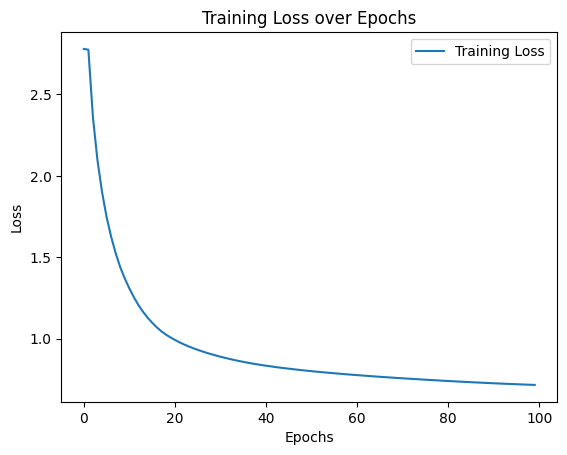

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are NumPy arrays

# Define SVM model using TensorFlow
class SVMModel(tf.Module):
    def __init__(self):
        self.W = tf.Variable(tf.random.normal([x_train.shape[1], 1]), name='weights')
        self.b = tf.Variable(tf.random.normal([1]), name='bias')

    def __call__(self, x):
        return tf.matmul(x, self.W) + self.b

def compute_svm_loss(outputs, targets):
    margin = 1.0
    return tf.reduce_mean(tf.maximum(0.0, margin - outputs * targets))

# Create SVM model instance
svm_model = SVMModel()

# Define learning rate as a function of epoch
def learning_rate_fn(epoch):
    return 0.9 / tf.sqrt(tf.cast(epoch + 1, dtype=tf.float32))

optimizer = tf.optimizers.SGD()

# Training loop
epochs = 100

# Evaluate the SVM model using Keras API
keras_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear')
])

keras_model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
keras_model.fit(x_train, y_train, epochs=epochs, batch_size=50, verbose=1)

losses = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        outputs = svm_model(tf.convert_to_tensor(x_train, dtype=tf.float32))
        targets = tf.expand_dims(tf.cast(y_train, dtype=tf.float32), 1)
        loss = compute_svm_loss(outputs, targets)

    gradients = tape.gradient(loss, [svm_model.W, svm_model.b])
    optimizer.apply_gradients(zip(gradients, [svm_model.W, svm_model.b]))

    # Update learning rate
    optimizer.learning_rate = learning_rate_fn(epoch)

    # Append loss to the array
    losses.append(loss.numpy())  # Convert loss to NumPy value for plotting

# Evaluate the model on the test set
accuracy = keras_model.evaluate(x_test, y_test)[1]
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the training loss
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

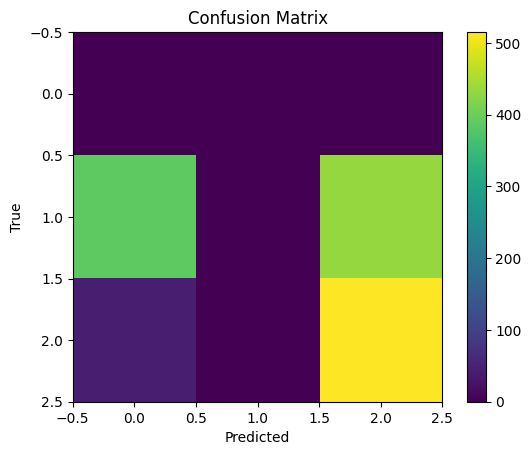

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = svm_model(tf.convert_to_tensor(x_test, dtype=tf.float32))
predictions = tf.sign(predictions).numpy()  # Convert to class labels

cm = confusion_matrix(y_test, predictions)
plt.imshow(cm, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


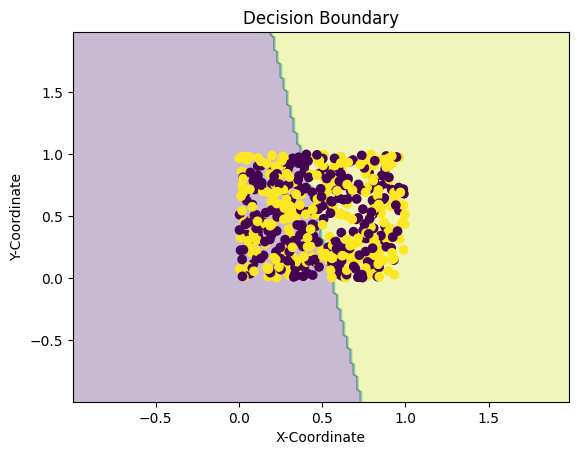

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate sample data
np.random.seed(10)
x_train = np.random.rand(500, 2)
y_train = np.random.randint(0, 2, size=(500,))

# Define the SVM model
svm_model = SVC(kernel='linear')

# Fit the SVM model
svm_model.fit(x_train, y_train)

# Create a meshgrid of points to evaluate
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Ensure xx and yy are float32
xx = xx.astype(np.float32)
yy = yy.astype(np.float32)

# Reshape xx and yy into a 2D array
X = np.c_[xx.ravel(), yy.ravel()]

# Predict on the meshgrid
predictions = svm_model.predict(X)

# Reshape predictions back to the shape of xx and yy
predictions = predictions.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, predictions, alpha=0.3)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('Decision Boundary')
plt.show()

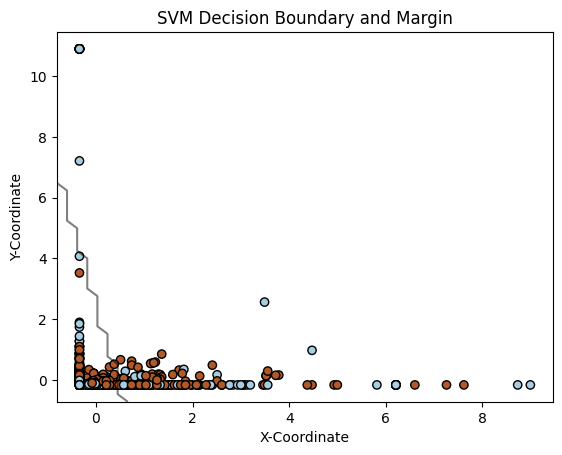

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k')

# Plot the decision boundary and margin
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
points = np.c_[xx.ravel(), yy.ravel()]

Z = svm_model.predict(points)  # Use predict method instead of reshape
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM Decision Boundary and Margin')
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.show()

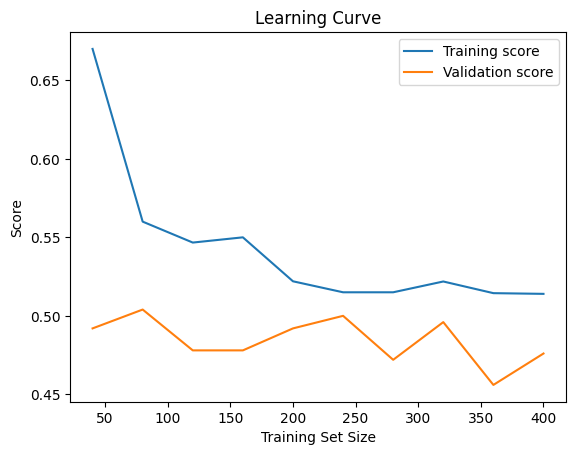

In [ ]:
from sklearn.model_selection import learning_curve

# Assuming you have your model, training data (x_train, y_train), and validation data (x_val, y_val)
train_sizes, train_scores, validation_scores = learning_curve(svm_model, x_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation score')
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test set
predictedYs = keras_model.predict(x_test)
predictedYs_binary = np.sign(predictedYs.flatten())  # Convert to binary labels (1 or -1)
print("item[0] predicted y =", predictedYs_binary[0])
print("item[0] true y =", y_test[0])

44/44 [==============================] - 0s 1ms/step
item[0] predicted y = 1.0
item[0] true y = 1
